In [1]:
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds


In [2]:
%matplotlib inline

In [3]:
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance)-1 for appliance in APPLIANCES_ORDER[1:]}

In [4]:
appliance_index

{'dw': 3, 'fridge': 1, 'hvac': 0, 'mw': 2, 'oven': 5, 'wm': 4}

In [44]:
region, year='Austin', 2014
df, dfc = create_matrix_single_region(region, year)
start, stop=1, 13
energy_cols = np.array([['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())
weather_values = np.array(dds[2014]['Austin'][start - 1:stop - 1]).reshape(-1, 1)

dfc = df.copy()

df = dfc[energy_cols]
col_max = df.max().max()
col_min = df.min().min()
#df = (1.0 * (df - col_min)) / (col_max - col_min)
tensor = df.values.reshape((len(df), 7, stop-start))
M, N, O = tensor.shape
mask = np.ones(M).astype('bool')

case=2
out = {}
for cost in ['abs','rel']:
    out[cost] = {}
    for a in range(1, 11):
        tensor_copy = tensor.copy()
    
        H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
        out[cost][a] = {'H':H, 'A':A, 'T':T}
        print a, cost



        
        


1 abs
2 abs
3 abs
4 abs
5 abs
6 abs
7 abs
8 abs
9 abs
10 abs
1 rel
2 rel
3 rel
4 rel
5 rel
6 rel
7 rel
8 rel
9 rel
10 rel


In [87]:
from plot_functions import *
import matplotlib.pyplot as plt

latexify(fig_width=5)

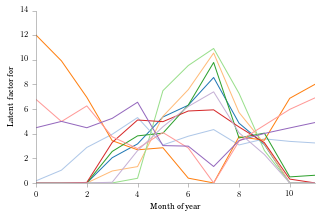

In [88]:
pd.DataFrame(out['abs'][10]['T']).plot(legend=None)
plt.xlabel("Month of year")
plt.ylabel("Latent factor for ")
#plt.set_legend(False)
format_axes(plt.gca())

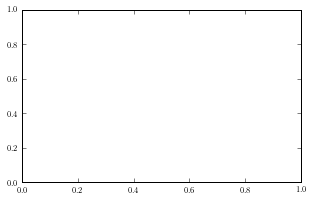

In [102]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    pd.DataFrame(out['abs'][i]['T']).plot(legend=None, ax=ax)
    ax.set_xlabel("Month of year")
    ax.set_ylabel("Latent factor for Months \n(Cost=abs) ")
    #plt.set_legend(False)
    format_axes(ax)
    #ax.set_xlabel(label)
    ax.set_title("Num latent factors: %d" %i)
    ax.set_ylim((0, 25))
    #fig.tight_layout()
    return ax

In [103]:
from matplotlib.animation import FuncAnimation


In [104]:
anim = FuncAnimation(fig, update, frames=np.arange(1, 11), interval=500)
    
anim.save('line.gif', dpi=120, writer='imagemagick')

![](line.gif)

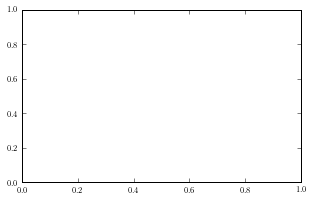

In [121]:
fig, ax = plt.subplots()

def update(i, cost):
    ax.clear()
    pd.DataFrame(out[cost][int(i)]['T']).plot(legend=None, ax=ax)
    ax.set_xlabel("Month of year")
    ax.set_ylabel("Latent factor for Months \n(Cost=%s) " %cost)
    #plt.set_legend(False)
    format_axes(ax)
    #ax.set_xlabel(label)
    ax.set_title("Num latent factors: %d" %i)
    if cost=='abs':
        ax.set_ylim((0, 25))
    else:
        ax.set_ylim((0, 1.5))
    #fig.tight_layout()
    return ax

In [122]:
cost = 'rel'
anim = FuncAnimation(fig, update, frames=np.arange(1, 11), fargs=[cost],interval=500)
    
anim.save('latent_%s.gif' %cost, dpi=120, writer='imagemagick')

In [110]:
np.array(zip(np.arange(1, 11), ['rel']*10))

array([['1', 'rel'],
       ['2', 'rel'],
       ['3', 'rel'],
       ['4', 'rel'],
       ['5', 'rel'],
       ['6', 'rel'],
       ['7', 'rel'],
       ['8', 'rel'],
       ['9', 'rel'],
       ['10', 'rel']], 
      dtype='|S21')

In [109]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])